In [24]:
#Exploratory data analysis (EDA)

# - summarize main characteristics of the data - gain better understanding of the dataset,
# - uncover relationships between different variables, and
# - extract important variables for the problem we are trying to solve.

import pandas as pd

url = '/content/imports-85.data'
df = pd.read_csv(url, header= None)
headers=["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers

#Desctiptive Statistics
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [25]:
drive_wheels_counts = df["drive-wheels"].value_counts()
print(drive_wheels_counts)

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64


In [26]:
#Boxplots
import seaborn as sns

df["price"] = pd.to_numeric(df["price"], errors='coerce')


In [27]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


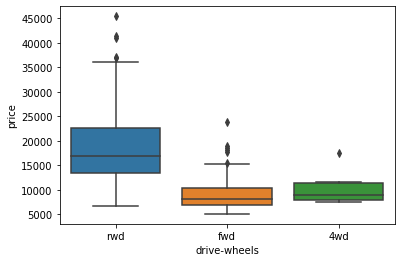

In [28]:
sns.boxplot(x = "drive-wheels", y = "price", data = df)

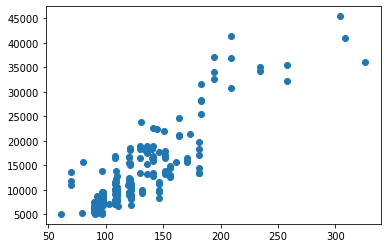

In [31]:
from matplotlib import pyplot as plt
x = df["engine-size"]
y = df["price"]

plt.scatter(x,y)

In [32]:
#GroupBy in python

'''
The group by method is used on categorical variables, groups the data into subsets according
to the different categories of that variable.
You can group by a single variable or you can group by multiple variables by passing
in multiple variable names.
'''

'\nThe group by method is used on categorical variables, groups the data into subsets according\nto the different categories of that variable.\nYou can group by a single variable or you can group by multiple variables by passing\nin multiple variable names.\n'

In [34]:
df_test = df[['drive-wheels', 'body-style', 'price']]
df_grp = df_test.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [36]:
#Pivot

df_pivot = df_grp.pivot(index= 'drive-wheels', columns='body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

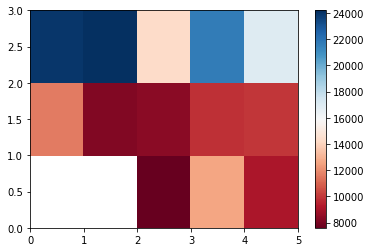

In [37]:
#Heatmap

plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

In [ ]:
#Analysis of Variance ANOVA

'''
The ANOVA test returns two values: the F-test score and the p-value.
The F-test calculates the ratio of variation between the groups's mean over the variation
within each of the sample groups.
The p-value shows whether the obtained result is statistically significant.
'''

In [45]:
from scipy import stats
df_anova = df[['make', 'price']]
grouped_anova=df_anova.groupby(['make'])

anova_results_1 = stats.f_oneway(grouped_anova.get_group("honda")["price"], grouped_anova.get_group("subaru")["price"])
anova_results_1

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

In [46]:
anova_results_1 = stats.f_oneway(grouped_anova.get_group("honda")["price"], grouped_anova.get_group("jaguar")["price"])
anova_results_1

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

(0.0, 53047.000661614205)

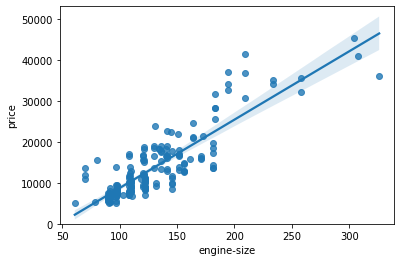

In [48]:
#Correlation

#Is a statistical metric for measuring to what extent different variables are interdependent.

sns.regplot(x="engine-size", y="price", data = df)
plt.ylim(0,)

(0.0, 48166.14996399963)

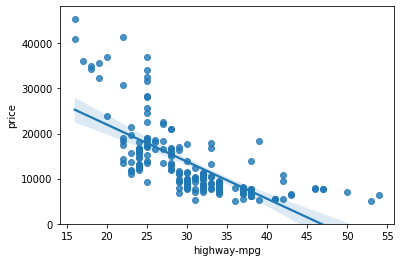

In [49]:
sns.regplot(x="highway-mpg", y="price", data = df)
plt.ylim(0,)

In [53]:
#Pearson Correlation
#For the correlation coefficient, a value close to 1 implies a large positive correlation,
#while a value close to -1 implies a large negative correlation and a value close to 0 implies no correlation between the variables.

df["horsepower"] = pd.to_numeric(df["horsepower"], errors='coerce')
df.dropna(subset=["horsepower"], axis=0, inplace=True)
df.dropna(subset=["price"], axis=0, inplace=True)
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])

In [54]:
pearson_coef

0.8105330821322061

In [55]:
p_value

1.189127827694731e-47